### Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn import preprocessing

In [2]:
%matplotlib inline

In [3]:
path = 'C:\\Users\\Marce\\careerfoundry\\food'

In [4]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'merged.pkl'))

In [5]:
pd.set_option('precision', 0)

In [6]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [7]:
df.shape

(4880275, 32)

In [8]:
df.head()

,adm0_id,Country,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,...,"Secondary education, pupils",Rural population (%),"Revenue, excluding grants (% of GDP)",Poverty headcount ratio at national poverty lines (% of population),Number of under-five deaths,Multidimensional poverty index (scale 0-1),"Mortality rate, infant (per 1,000 live births)","Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population)",_merge,Price category
0,1.000,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.000,AFN,...,2725421.000,74.980,12.678,54.500,79915.000,0.270,51.300,13.900,both,Low price
1,1.000,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.000,AFN,...,2899453.000,74.750,13.039,NaN,77124.000,NaN,49.600,NaN,both,Low price
2,1.000,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.000,AFN,...,3063889.000,74.505,NaN,NaN,74595.000,NaN,48.000,NaN,both,Low price
3,1.000,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.000,AFN,...,NaN,74.246,NaN,NaN,72186.000,NaN,46.500,NaN,both,Low price
4,1.000,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.000,AFN,...,NaN,73.974,NaN,NaN,NaN,NaN,NaN,NaN,both,Low price


In [9]:
df.columns

Index(['adm0_id', 'Country', 'adm1_id', 'adm1_name', 'mkt_id', 'mkt_name',
       'cm_id', 'cm_name', 'cur_id', 'cur_name', 'pt_id', 'pt_name', 'um_id',
       'um_name', 'mp_month', 'mp_year', 'mp_price', 'mp_commoditysource',
       'Time',
       'Total alcohol consumption per capita, male (liters of pure alcohol)',
       'Taxes on goods and services', 'Tax payments',
       'Secondary education, pupils', 'Rural population (%)',
       'Revenue, excluding grants (% of GDP)',
       'Poverty headcount ratio at national poverty lines (% of population) ',
       'Number of under-five deaths ',
       'Multidimensional poverty index (scale 0-1)',
       'Mortality rate, infant (per 1,000 live births)',
       'Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population)',
       '_merge', 'Price category'],
      dtype='object')

In [10]:
df2 = df[['Country','Time','mp_price','mp_month','Taxes on goods and services','Revenue, excluding grants (% of GDP)','Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population)']]

In [11]:
df2.rename(columns={'Taxes on goods and services':'Taxes','Revenue, excluding grants (% of GDP)':'Revenue','Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population)':'mortality'},inplace=True)

C:\Users\Marce\anaconda3\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [12]:
df2.head()

,Country,Time,mp_price,mp_month,Taxes,Revenue,mortality
0,Afghanistan,2016.000,50.000,1,44737123118.000,12.678,13.900
1,Afghanistan,2017.000,50.000,1,53188616509.000,13.039,NaN
2,Afghanistan,2018.000,50.000,1,NaN,NaN,NaN
3,Afghanistan,2019.000,50.000,1,NaN,NaN,NaN
4,Afghanistan,2020.000,50.000,1,NaN,NaN,NaN


In [13]:
df2.shape

(4880275, 7)

In [14]:
df2.describe()

,Time,mp_price,mp_month,Taxes,Revenue,mortality
count,4880275.000,4880275.000,4880275.000,2993182.000,2993182.000,976055.000
mean,2018.000,8405.516,6.367,66239135729629.070,18.201,30.405
std,1.414,151822.465,3.398,191989574264493.062,6.304,26.037
min,2016.000,0.013,1.000,24959917.290,0.000,0.100
25%,2017.000,122.310,3.000,84784811000.000,14.205,7.100
50%,2018.000,400.000,6.000,615000000000.000,19.195,19.600
75%,2019.000,2000.000,9.000,2940000000000.000,20.725,45.200
max,2020.000,21777780.000,12.000,705000000000000.000,42.814,101.000


In [15]:
df3 = df2[df2['Time'] == 2016]

In [16]:
df3.head()

,Country,Time,mp_price,mp_month,Taxes,Revenue,mortality
0,Afghanistan,2016.000,50.000,1,44737123118.000,12.678,13.900
5,Afghanistan,2016.000,50.000,2,44737123118.000,12.678,13.900
10,Afghanistan,2016.000,50.000,3,44737123118.000,12.678,13.900
15,Afghanistan,2016.000,50.000,4,44737123118.000,12.678,13.900
20,Afghanistan,2016.000,50.000,5,44737123118.000,12.678,13.900


In [17]:
df3.shape

(976055, 7)

In [18]:
df3.isnull().sum()

Country           0
Time              0
mp_price          0
mp_month          0
Taxes        215383
Revenue      215383
mortality         0
dtype: int64

In [19]:
df3.describe()

,Time,mp_price,mp_month,Taxes,Revenue,mortality
count,976055.000,976055.000,976055.000,760672.000,760672.000,976055.000
mean,2016.000,8405.516,6.367,56006979439446.680,18.003,30.405
std,0.000,151822.527,3.398,162858591997387.281,4.483,26.037
min,2016.000,0.013,1.000,1652936750.000,9.268,0.100
25%,2016.000,122.310,3.000,65735587000.000,16.048,7.100
50%,2016.000,400.000,6.000,517000000000.000,17.720,19.600
75%,2016.000,2000.000,9.000,3280000000000.000,20.035,45.200
max,2016.000,21777780.000,12.000,557000000000000.000,34.920,101.000


In [20]:
df3.median()

C:\Users\Marce\AppData\Local\Temp/ipykernel_14360/3131045010.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df3.median()


Time                2016.000
mp_price             400.000
mp_month               6.000
Taxes       517000000000.000
Revenue               17.720
mortality             19.600
dtype: float64

In [21]:
df3['Taxes'].fillna(df3['Taxes'].median(), inplace = True)
df3['Revenue'].fillna(df3['Revenue'].median(), inplace = True)

C:\Users\Marce\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [22]:
df3.isnull().sum()

Country      0
Time         0
mp_price     0
mp_month     0
Taxes        0
Revenue      0
mortality    0
dtype: int64

In [23]:
le = preprocessing.LabelEncoder()
df3["Country"] = le.fit_transform(df3.Country.values)

C:\Users\Marce\AppData\Local\Temp/ipykernel_14360/2619997228.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["Country"] = le.fit_transform(df3.Country.values)


### 2. The elbow technique

In [24]:
# define range of potential clusters
num_cl = range(1, 5)

# define k-means clusters in the range from above
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [25]:
# create a score that represents a rate of variation for the given cluster option
score = [kmeans[i].fit(df3).score(df3) for i in range(len(kmeans))]

score

[-2.0692065841197722e+34,
 -8.162994814451487e+31,
 -2.2495364360490063e+30,
 -3.0464950278963384e+29]

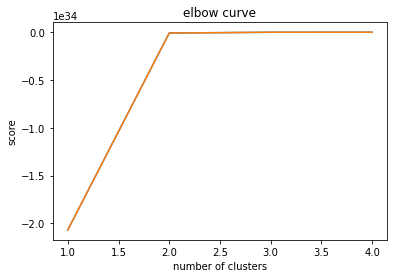

In [26]:
# Plot the elbow curve using PyLab

pl.plot(num_cl,score)
pl.xlabel('number of clusters')
pl.ylabel('score')
pl.title('elbow curve')
pl.plot(num_cl,score)
pl.show()

# breakpoint is clearly 2, that's why I chose 2

### 3. k-means clustering

In [27]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 2, n_jobs = -1) 

In [28]:
kmeans.fit(df3)

C:\Users\Marce\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=2, n_jobs=-1)

In [29]:
df3['clusters'] = kmeans.fit_predict(df3)

C:\Users\Marce\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\Marce\AppData\Local\Temp/ipykernel_14360/2121862071.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['clusters'] = kmeans.fit_predict(df3)


In [30]:
df3.head(5)

,Country,Time,mp_price,mp_month,Taxes,Revenue,mortality,clusters
0,0,2016.000,50.000,1,44737123118.000,12.678,13.900,0
5,0,2016.000,50.000,2,44737123118.000,12.678,13.900,0
10,0,2016.000,50.000,3,44737123118.000,12.678,13.900,0
15,0,2016.000,50.000,4,44737123118.000,12.678,13.900,0
20,0,2016.000,50.000,5,44737123118.000,12.678,13.900,0


In [31]:
df3["clusters"].value_counts()

0    903618
1     72437
Name: clusters, dtype: int64

In [32]:
df3.describe()

,Country,Time,mp_price,mp_month,Taxes,Revenue,mortality,clusters
count,976055.000,976055.000,976055.000,976055.000,976055.000,976055.000,976055.000,976055.000
mean,23.783,2016.000,8405.516,6.367,43762179462761.031,17.940,30.405,0.074
std,11.242,0.000,151822.527,3.398,145601216332045.125,3.959,26.037,0.262
min,0.000,2016.000,0.013,1.000,1652936750.000,9.268,0.100,0.000
25%,15.000,2016.000,122.310,3.000,313000000000.000,16.048,7.100,0.000
50%,25.000,2016.000,400.000,6.000,517000000000.000,17.720,19.600,0.000
75%,35.000,2016.000,2000.000,9.000,1010000000000.000,20.035,45.200,0.000
max,42.000,2016.000,21777780.000,12.000,557000000000000.000,34.920,101.000,1.000


In [33]:
df3.median()

Country               25.000
Time                2016.000
mp_price             400.000
mp_month               6.000
Taxes       517000000000.000
Revenue               17.720
mortality             19.600
clusters               0.000
dtype: float64

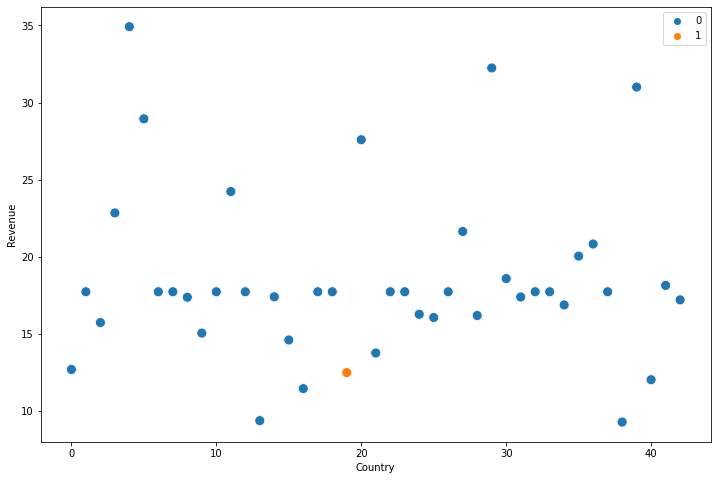

In [34]:
# Plot the clusters

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df3['Country'], y=df3['Revenue'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Country') # Label x-axis.
plt.ylabel('Revenue') # Label y-axis.
plt.show()

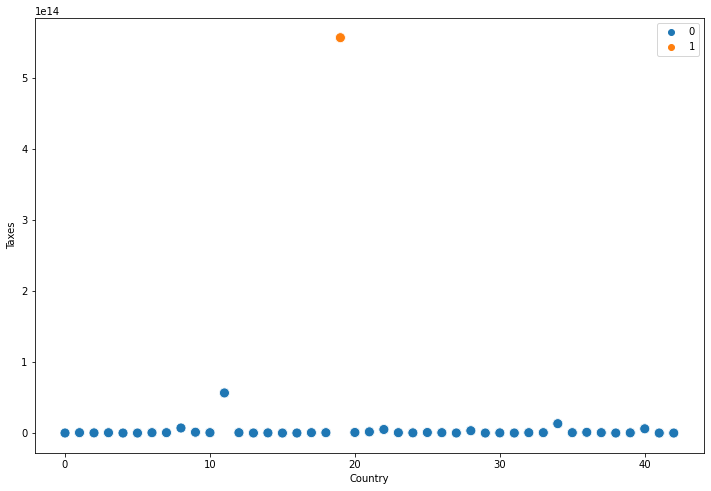

In [35]:
# Plot the clusters

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df3['Country'], y=df3['Taxes'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Country') # Label x-axis.
plt.ylabel('Taxes') # Label y-axis.
plt.show()

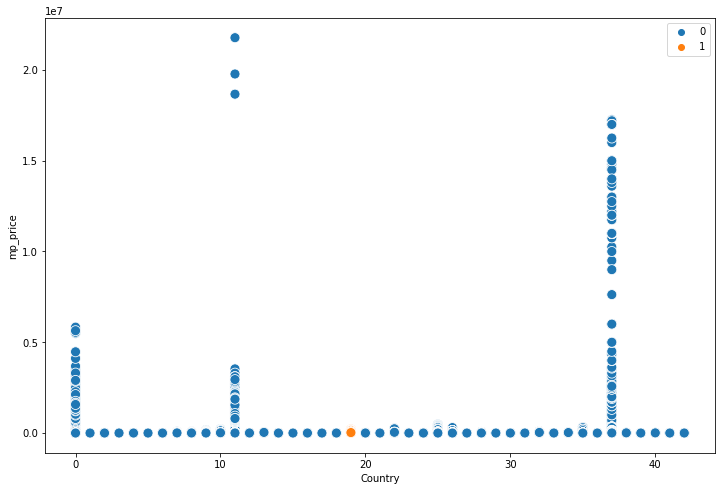

In [36]:
# Plot the clusters

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df3['Country'], y=df3['mp_price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Country') 
plt.ylabel('mp_price')
plt.savefig('neinman.png')
plt.show()

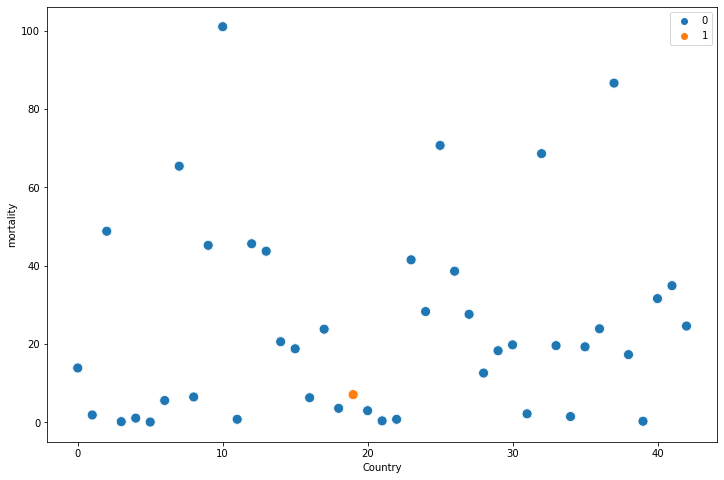

In [37]:
# Plot the clusters

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df3['Country'], y=df3['mortality'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Country') # Label x-axis.
plt.ylabel('mortality') # Label y-axis.
plt.show()

In [38]:
df3.loc[df3['clusters'] == 0, 'clusters'] = 'red'
df3.loc[df3['clusters'] == 1, 'clusters'] = 'blue'

C:\Users\Marce\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [39]:
df3.groupby('clusters').agg({'Taxes':['mean', 'median'],
                         'mp_price':['mean', 'median'], 
                         'Revenue':['mean', 'median'],
                          'mortality':['mean', 'median'],})

Taxes                      mp_price           Revenue  \
                        mean              median      mean    median    mean   
clusters                                                                       
blue     556999999999999.938 557000000000000.000 34460.108 23916.667  12.474   
red        2619342547835.713    517000000000.000  6316.894   348.330  18.379   

                mortality         
         median      mean median  
clusters                          
blue     12.474     7.100  7.100  
red      17.720    32.273 23.900

###

###